In [ ]:
!python --version

Python 3.7.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Read Data
Da es noch ein paar Schwierigkeiten mit dem Import der preprocessor files gab, werden die jeweiligen Funktionen in 
diesem Notebook definiert und ausgeführt.

In [ ]:
# read data power plants
data_power_plant_a = pd.read_csv("../data/data_power_plants/A.csv")
data_power_plant_b = pd.read_csv("../data/data_power_plants/B.csv")
data_power_plant_c = pd.read_csv("../data/data_power_plants/C.csv")
data_weather = pd.read_csv("../data/data_weather/weather_aargau_2019.csv")

In [ ]:
def _format_columns(df):
    columns_lower = df.columns.str.lower()
    columns_clean = columns_lower.str.replace("-", "")
    df.columns = columns_clean
    return df


def _set_datetime_index(df):
    """ create datetime index based on local_time,
    and resampled mean per hour"""
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.set_index(df["timestamp"], inplace=True)
    df = df.resample("h").mean()
    return df

In [ ]:
data_power_plant_a = _format_columns(data_power_plant_a)
data_power_plant_b = _format_columns(data_power_plant_b)
data_power_plant_c = _format_columns(data_power_plant_c)

data_power_plant_a = _set_datetime_index(data_power_plant_a)
data_power_plant_b = _set_datetime_index(data_power_plant_b)
data_power_plant_c = _set_datetime_index(data_power_plant_c)

## Data Visualisation
Eine einfache Visualisierung der Daten für einen ersten Überblick. 
--> Erkenntnisse: 
- Power Plant C hat weniger Daten (Spalten) als die anderen zwei
- Alle Power Plans unterscheiden sich stark, was ihre Energieproduktion angeht

In [ ]:
data_power_plant_a

,generation_kw,grid_feedin_kw,grid_supply_kw,overall_consumption_calc_kw
timestamp,,,,
2019-01-01 00:00:00,0.000,0.000,4.214,4.214
2019-01-01 01:00:00,0.000,0.000,4.212,4.212
2019-01-01 02:00:00,0.000,0.000,4.364,4.364
2019-01-01 03:00:00,0.000,0.000,4.214,4.214
2019-01-01 04:00:00,0.000,0.000,4.364,4.364
2019-01-01 05:00:00,0.000,0.000,4.214,4.214
2019-01-01 06:00:00,0.000,0.000,4.362,4.362
2019-01-01 07:00:00,0.000,0.000,4.216,4.216
2019-01-01 08:00:00,0.076,0.000,4.598,4.674


In [ ]:
data_power_plant_b

,generation_kw,grid_feedin_kw,grid_supply_kw,overall_consumption_calc_kw
timestamp,,,,
2019-01-01 00:00:00,0.000,0.000,5.775,5.775
2019-01-01 01:00:00,0.000,0.000,5.550,5.550
2019-01-01 02:00:00,0.000,0.000,5.625,5.625
2019-01-01 03:00:00,0.000,0.000,5.550,5.550
2019-01-01 04:00:00,0.000,0.000,5.625,5.625
2019-01-01 05:00:00,0.000,0.000,5.700,5.700
2019-01-01 06:00:00,0.000,0.000,7.800,7.800
2019-01-01 07:00:00,0.000,0.000,7.950,7.950
2019-01-01 08:00:00,0.075,0.000,7.425,7.500


In [ ]:
data_power_plant_c

,grid_feedin_kw,grid_supply_kw
timestamp,,
2019-01-01 00:00:00,0.00,2.90
2019-01-01 01:00:00,0.00,4.05
2019-01-01 02:00:00,0.00,4.65
2019-01-01 03:00:00,0.00,2.90
2019-01-01 04:00:00,0.00,2.95
2019-01-01 05:00:00,0.00,2.85
2019-01-01 06:00:00,0.00,2.95
2019-01-01 07:00:00,0.00,3.45
2019-01-01 08:00:00,0.00,3.55


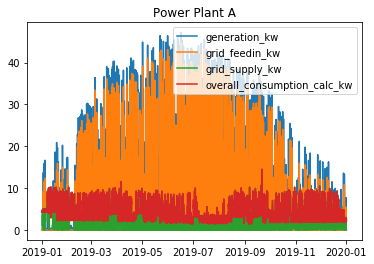

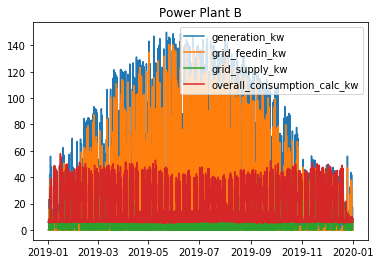

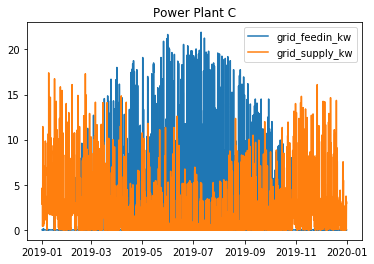

In [ ]:
plt.plot(data_power_plant_a)
plt.title("Power Plant A")
plt.legend(data_power_plant_a.columns)
plt.show()

plt.plot(data_power_plant_b)
plt.title("Power Plant B")
plt.legend(data_power_plant_b.columns)
plt.show()

plt.plot(data_power_plant_c)
plt.title("Power Plant C")
plt.legend(data_power_plant_c.columns)
plt.show()

## Pre Process Weather Data + Visualization
Findings:
- Wetterdaten fehlen für eine Stunde --> interpoliert

In [ ]:
def weather_format_columns(df):
        columns_lower = df.columns.str.lower()
        columns_clean = columns_lower.str.replace("-", "")
        df.columns = columns_clean
        return df


def weather_set_datetime_index(df):
    """ create datetime index based on local_time,
    and resampled mean per hour"""
    df["timestamp"] = pd.to_datetime(df["local_time"])
    df.set_index(df["timestamp"], inplace=True)
    df = df.resample("h").mean()
    return df

In [ ]:
data_weather = weather_format_columns(data_weather)
data_weather = weather_set_datetime_index(data_weather)

In [ ]:
data_weather

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover
timestamp,,,,,,,,
2019-01-01 01:00:00,-2.542,0.001,0.000,10.513,1.106,0.000,0.000,0.001
2019-01-01 02:00:00,-2.190,0.001,0.000,10.515,1.106,0.000,0.000,0.043
2019-01-01 03:00:00,-2.182,0.001,0.000,10.516,1.106,0.000,0.000,0.171
2019-01-01 04:00:00,-2.230,0.000,0.000,10.517,1.106,0.000,0.000,0.379
2019-01-01 05:00:00,-2.113,0.000,0.000,10.517,1.105,0.000,0.000,0.558
2019-01-01 06:00:00,-2.122,0.000,0.000,10.518,1.105,0.000,0.000,0.554
2019-01-01 07:00:00,-2.005,0.000,0.000,10.518,1.105,0.000,0.000,0.623
2019-01-01 08:00:00,-1.880,0.000,0.000,10.518,1.105,29.181,67.203,0.685
2019-01-01 09:00:00,-0.783,0.000,0.000,10.518,1.105,146.093,247.624,0.648


Find Rows with missing Data

In [ ]:
data_weather[data_weather.isnull().any(axis=1)]

DatetimeIndex(['2019-03-31 02:00:00'], dtype='datetime64[ns]', name='timestamp', freq='H')

Look at the data of this day (Raw output) --> Only temperature has a value, which would not be correct, if we simply
take the average of the time before and after the missing values 

In [ ]:
data_weather.loc['2019-03-31']

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover
timestamp,,,,,,,,
2019-03-31 00:00:00,3.691,0.0,0.0,0.019,1.081,0.000,0.000,0.000
2019-03-31 01:00:00,3.410,0.0,0.0,0.019,1.081,0.000,0.000,0.000
2019-03-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31 03:00:00,3.149,0.0,0.0,0.019,1.081,0.000,0.000,0.000
2019-03-31 04:00:00,2.813,0.0,0.0,0.019,1.082,0.000,0.000,0.000
2019-03-31 05:00:00,2.288,0.0,0.0,0.019,1.083,0.000,0.000,0.000
2019-03-31 06:00:00,1.702,0.0,0.0,0.019,1.084,0.000,0.000,0.000
2019-03-31 07:00:00,1.534,0.0,0.0,0.019,1.084,42.887,81.868,0.000
2019-03-31 08:00:00,3.908,0.0,0.0,0.019,1.084,219.470,321.597,0.000


Interpolate missing data

In [ ]:
data_weather_clean = data_weather.interpolate()

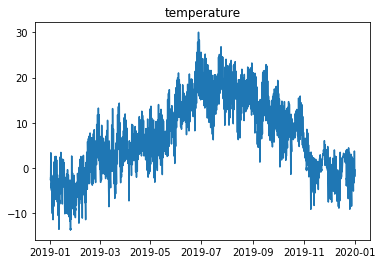

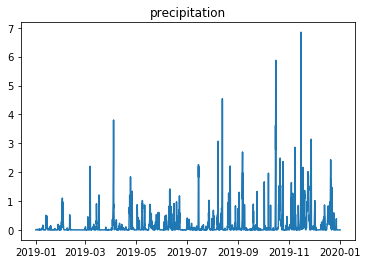

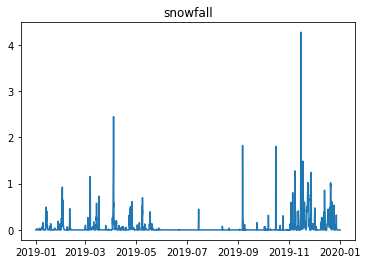

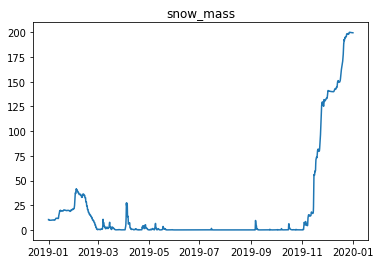

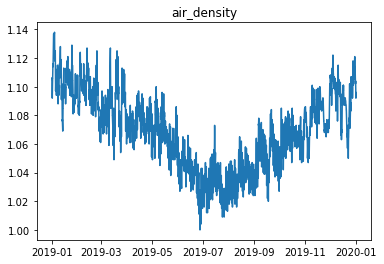

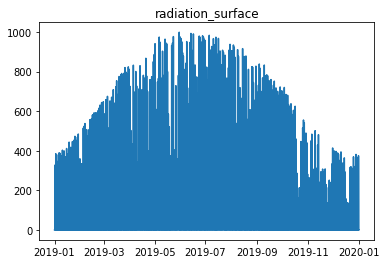

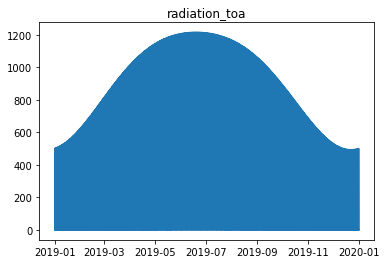

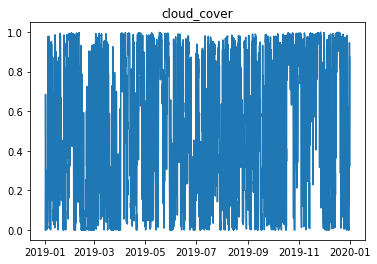

In [ ]:
plt.plot(data_weather_clean["temperature"])
plt.title("temperature")
plt.show()

plt.plot(data_weather_clean["precipitation"])
plt.title("precipitation")
plt.show()

plt.plot(data_weather_clean["snowfall"])
plt.title("snowfall")
plt.show()

plt.plot(data_weather_clean["snow_mass"])
plt.title("snow_mass")
plt.show()

plt.plot(data_weather_clean["air_density"])
plt.title("air_density")
plt.show()

plt.plot(data_weather_clean["radiation_surface"])
plt.title("radiation_surface")
plt.show()

plt.plot(data_weather_clean["radiation_toa"])
plt.title("radiation_toa")
plt.show()

plt.plot(data_weather_clean["cloud_cover"])
plt.title("cloud_cover")
plt.show()


## Prepare Data for a simple Linear Regression
To Do:
- Daten der Power Plants mit den Wetterdaten verbinden
- Daten pro Power Plant in Test und Validation Set splitten
- Simples Regressionsmodell erstellen
- Regressionsmodell testen
- Sobald das Regressionsmodell genügt -> Output predicten und neues DF generieren (actual output, Works properly)

#### Merge Power Plant and Weather Data

In [ ]:
# Inner Join weil es keine Wetterdaten für 1.1.2019 00:00 Uhr gibt
df_a = data_power_plant_a.copy().join(data_weather_clean, how='inner')
df_b = data_power_plant_b.copy().join(data_weather_clean, how='inner')
df_c = data_power_plant_c.copy().join(data_weather_clean, how='inner')

#### split data

In [ ]:
df_a_train, df_a_test = train_test_split(df_a, test_size=0.2, random_state=123)
df_b_train, df_b_test = train_test_split(df_b, test_size=0.2, random_state=123)
df_c_train, df_c_test = train_test_split(df_c, test_size=0.2, random_state=123)

In [ ]:
print(len(df_a))
print(len(df_a_train))
print(len(df_a_validation))
print('-'*20)
print(len(df_b))
print(len(df_b_train))
print(len(df_b_validation))
print('-'*20)
print(len(df_c))
print(len(df_c_train))
print(len(df_c_validation))

8759
7007
1671
--------------------
8759
7007
1711
--------------------
8759
7007
1801


#### Create Linear Regression Model

In [ ]:
X = df_a_train["radiation_surface"].values.reshape(len(df_a_train), 1)
y = df_a_train["grid_feedin_kw"].values.reshape(len(df_a_train), 1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7379392338136096